## Analysis and Prediction of Heart Patients

#### This project helps to analyze and to predict how different symptoms of patients related to heart disease are responsible to be diagnose as a heart patient. Also it helps to visualize the data of heart patients of different age groups and gender so that we can easily predict whether any person is heart patient or not depending on symptoms.

In [1]:
#Importing required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

from pandas import DataFrame
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Importing Dataset
test = pd.read_csv('heart.csv')

In [3]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
age             1025 non-null int64
sex             1025 non-null int64
chest_pain      1025 non-null int64
trestbps        1025 non-null int64
chol            1025 non-null int64
fst_bld_sug     1025 non-null int64
restecg         1025 non-null int64
max_hrt_rate    1025 non-null int64
exangina        1025 non-null int64
oldpeak         1025 non-null float64
slope           1025 non-null int64
ca              1025 non-null int64
thal            1025 non-null int64
target          1025 non-null int64
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
test.head(5)

,age,sex,chest_pain,trestbps,chol,fst_bld_sug,restecg,max_hrt_rate,exangina,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
test = test.drop(['oldpeak', 'slope'], axis=1)

In [6]:
test.columns

Index(['age', 'sex', 'chest_pain', 'trestbps', 'chol', 'fst_bld_sug',
       'restecg', 'max_hrt_rate', 'exangina', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 12 columns):
age             1025 non-null int64
sex             1025 non-null int64
chest_pain      1025 non-null int64
trestbps        1025 non-null int64
chol            1025 non-null int64
fst_bld_sug     1025 non-null int64
restecg         1025 non-null int64
max_hrt_rate    1025 non-null int64
exangina        1025 non-null int64
ca              1025 non-null int64
thal            1025 non-null int64
target          1025 non-null int64
dtypes: int64(12)
memory usage: 96.2 KB


## Data Visualization


#### Data Cleaning & Blending

In [8]:
df = pd.read_csv('heart.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
age             1025 non-null int64
sex             1025 non-null int64
chest_pain      1025 non-null int64
trestbps        1025 non-null int64
chol            1025 non-null int64
fst_bld_sug     1025 non-null int64
restecg         1025 non-null int64
max_hrt_rate    1025 non-null int64
exangina        1025 non-null int64
oldpeak         1025 non-null float64
slope           1025 non-null int64
ca              1025 non-null int64
thal            1025 non-null int64
target          1025 non-null int64
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [10]:
df.head()

,age,sex,chest_pain,trestbps,chol,fst_bld_sug,restecg,max_hrt_rate,exangina,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [11]:
df['sex'] = df['sex'].replace(1,'M')

In [12]:
df['sex'] = df['sex'].replace(0,'F')

In [13]:
df['chest_pain'] = df['chest_pain'].replace(0,'No')

In [14]:
df['chest_pain'] = df['chest_pain'].replace(1,'Low')

In [15]:
df['chest_pain'] = df['chest_pain'].replace(2,'Medium')

In [16]:
df['chest_pain'] = df['chest_pain'].replace(3,'High')

In [17]:
df['fst_bld_sug'] = df['fst_bld_sug'].replace(0,'No')

In [18]:
df['fst_bld_sug'] = df['fst_bld_sug'].replace(1,'Yes')

In [19]:
df['target'] = df['target'].replace(0,'Not a Patient')

In [20]:
df['target'] = df['target'].replace(1,'Heart Patient')

In [21]:
df.head(20)

,age,sex,chest_pain,trestbps,chol,fst_bld_sug,restecg,max_hrt_rate,exangina,oldpeak,slope,ca,thal,target
0,52,M,No,125,212,No,1,168,0,1.0,2,2,3,Not a Patient
1,53,M,No,140,203,Yes,0,155,1,3.1,0,0,3,Not a Patient
2,70,M,No,145,174,No,1,125,1,2.6,0,0,3,Not a Patient
3,61,M,No,148,203,No,1,161,0,0.0,2,1,3,Not a Patient
4,62,F,No,138,294,Yes,1,106,0,1.9,1,3,2,Not a Patient
5,58,F,No,100,248,No,0,122,0,1.0,1,0,2,Heart Patient
6,58,M,No,114,318,No,2,140,0,4.4,0,3,1,Not a Patient
7,55,M,No,160,289,No,0,145,1,0.8,1,1,3,Not a Patient
8,46,M,No,120,249,No,0,144,0,0.8,2,0,3,Not a Patient
9,54,M,No,122,286,No,0,116,1,3.2,1,2,2,Not a Patient


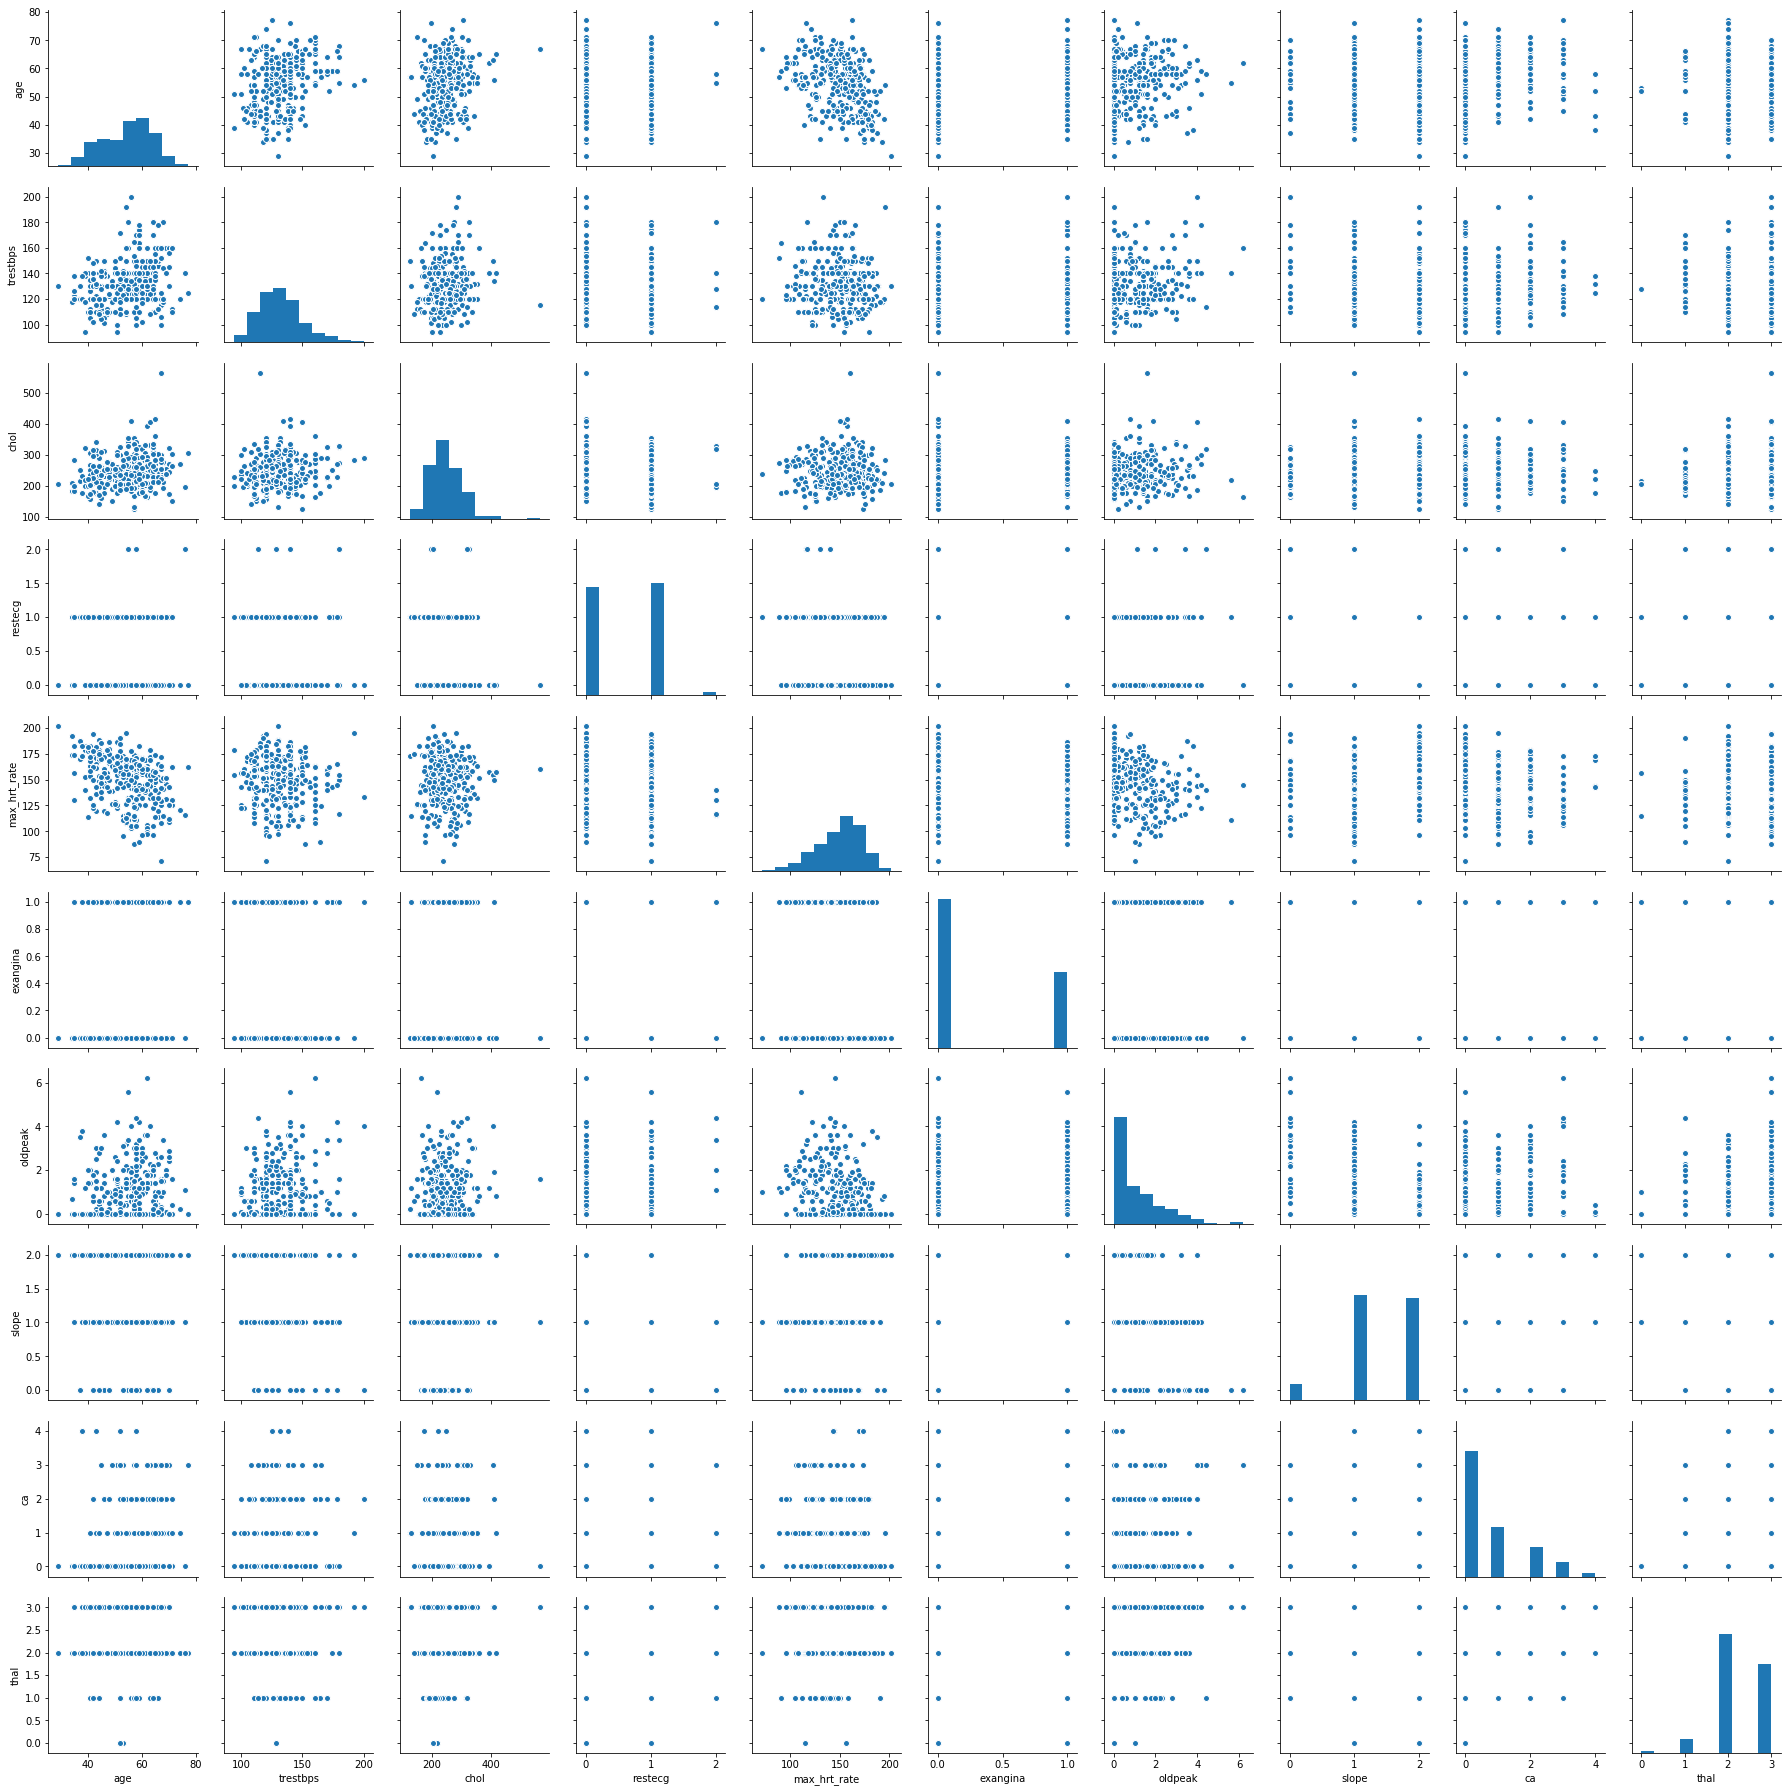

In [22]:
sns.pairplot(df)

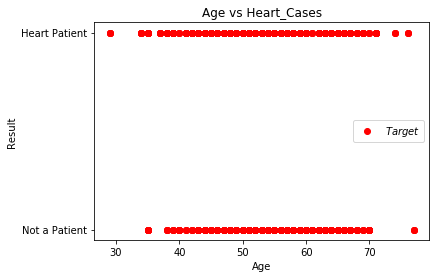

In [23]:
plt.scatter(df.age, df.target, label=r'$Target$', color='red', marker='o')
plt.gca().update(dict(title='Age vs Heart_Cases', xlabel='Age', ylabel='Result'))
plt.legend()
plt.show()

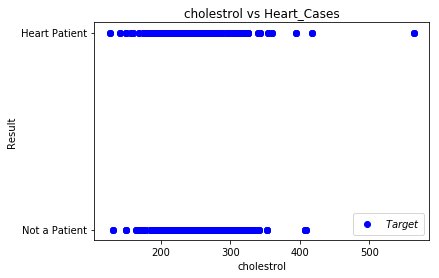

In [24]:
plt.scatter(df.chol, df.target, label=r'$Target$', color='blue', marker='o')
plt.gca().update(dict(title='cholestrol vs Heart_Cases', xlabel='cholestrol', ylabel='Result'))
plt.legend()
plt.show()

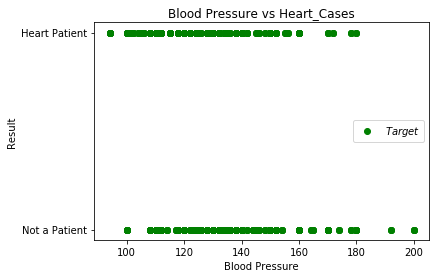

In [25]:
plt.scatter(df.trestbps, df.target, label=r'$Target$', color='green', marker='o')
plt.gca().update(dict(title='Blood Pressure vs Heart_Cases', xlabel='Blood Pressure', ylabel='Result'))
plt.legend()
plt.show()

In [26]:
df.target.value_counts()

Heart Patient    526
Not a Patient    499
Name: target, dtype: int64

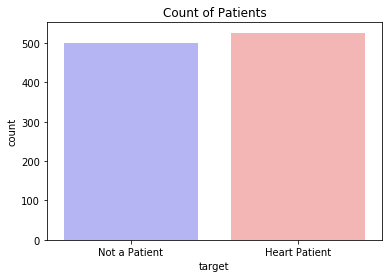

In [27]:
sns.countplot(x="target", data=df, palette="bwr").set_title('Count of Patients')
plt.title=("Barplot showing count of Patients")
plt.show()

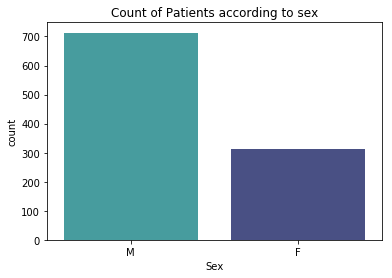

In [28]:
sns.countplot(x='sex', data=df, palette="mako_r").set_title('Count of Patients according to sex')
plt.xlabel("Sex")
plt.show()

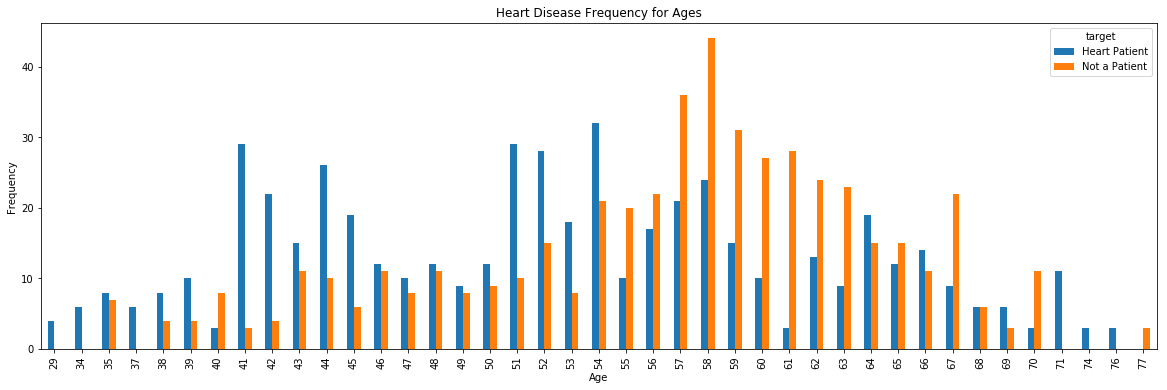

In [29]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.gca().update(dict(title='Heart Disease Frequency for Ages', xlabel='Age', ylabel='Frequency'))
plt.savefig('heartDiseaseAndAges.png')
plt.show()

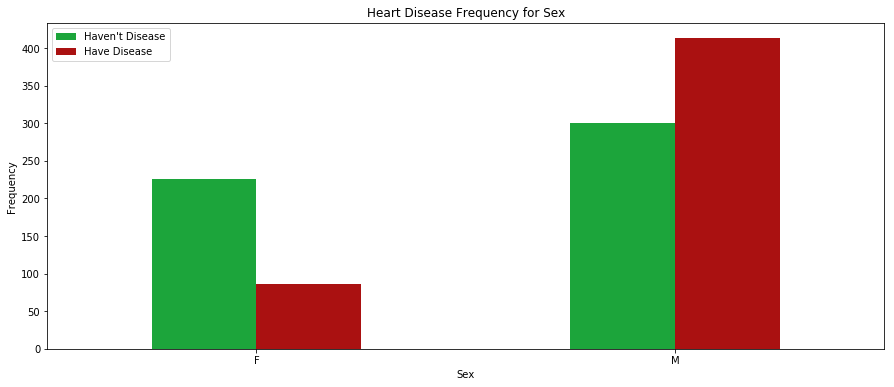

In [30]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111'])
plt.gca().update(dict(title='Heart Disease Frequency for Sex', xlabel='Sex', ylabel='Frequency'))
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.show()

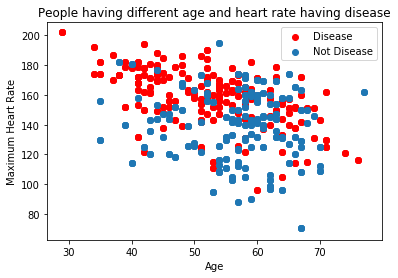

In [31]:
plt.scatter(x=df.age[df.target=='Heart Patient'], y=df.max_hrt_rate[(df.target=='Heart Patient')], c="red")
plt.scatter(x=df.age[df.target=='Not a Patient'], y=df.max_hrt_rate[(df.target=='Not a Patient')])
plt.legend(["Disease", "Not Disease"])
plt.gca().update(dict(title='People having different age and heart rate having disease', 
                      xlabel='Age', ylabel='Maximum Heart Rate'))
plt.show()

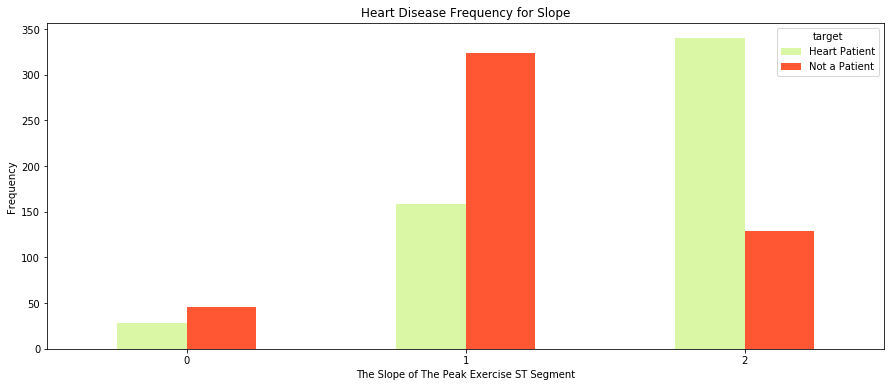

In [32]:
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.gca().update(dict(title='Heart Disease Frequency for Slope', 
                      xlabel='The Slope of The Peak Exercise ST Segment', ylabel='Frequency'))
plt.xticks(rotation = 0)
plt.show()

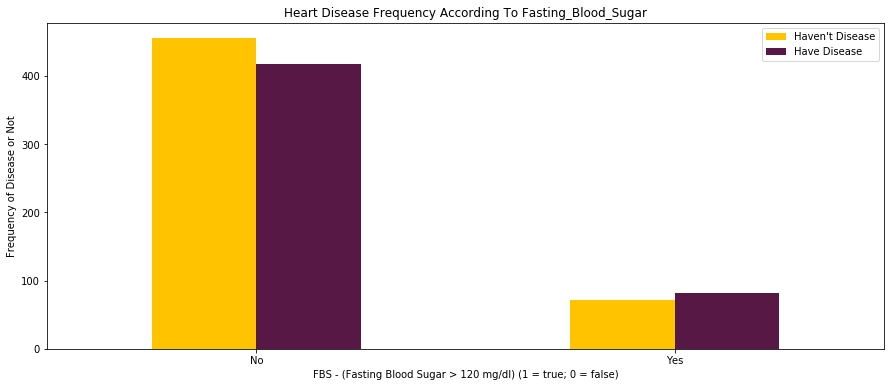

In [33]:
pd.crosstab(df.fst_bld_sug,df.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.gca().update(dict(title='Heart Disease Frequency According To Fasting_Blood_Sugar', 
        xlabel='FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)', ylabel='Frequency of Disease or Not'))
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.show()

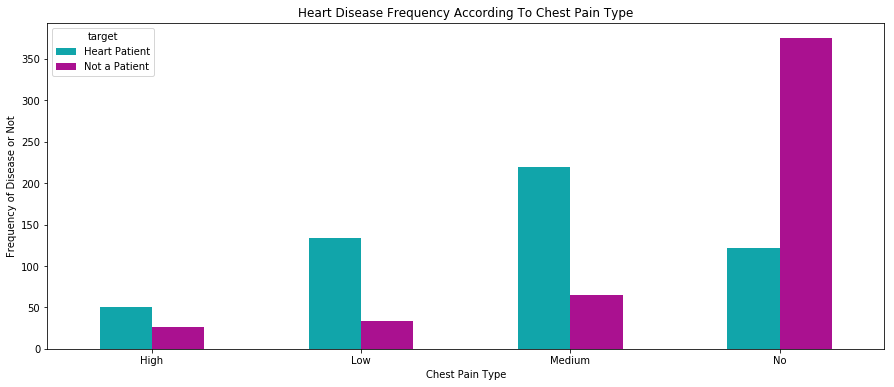

In [34]:
pd.crosstab(df.chest_pain,df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.gca().update(dict(title='Heart Disease Frequency According To Chest Pain Type', 
                      xlabel='Chest Pain Type', ylabel='Frequency of Disease or Not'))
plt.xticks(rotation = 0)
plt.show()

In [35]:
test.columns

Index(['age', 'sex', 'chest_pain', 'trestbps', 'chol', 'fst_bld_sug',
       'restecg', 'max_hrt_rate', 'exangina', 'ca', 'thal', 'target'],
      dtype='object')

In [36]:
mod_col = test[['age', 'sex', 'chest_pain', 'trestbps', 'chol', 'fst_bld_sug',
       'restecg', 'max_hrt_rate', 'exangina', 'ca', 'thal']]

In [37]:
#!pip install yellowbrick

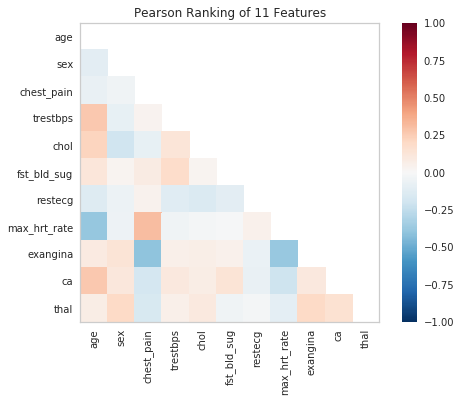

In [38]:
from yellowbrick.features import Rank2D

visualizer = Rank2D(algorithm="pearson")
visualizer.fit_transform(mod_col)
visualizer.show()

### Applying Sampling technique

In [39]:
X = test.drop('target', axis=1)
X = X.values
Y = test['target']

In [40]:
X

array([[52,  1,  0, ...,  0,  2,  3],
       [53,  1,  0, ...,  1,  0,  3],
       [70,  1,  0, ...,  1,  0,  3],
       ...,
       [47,  1,  0, ...,  1,  1,  2],
       [50,  0,  0, ...,  0,  0,  2],
       [54,  1,  0, ...,  0,  1,  3]])

In [41]:
X.shape

(1025, 11)

In [42]:
Y

0       0
1       0
2       0
3       0
4       0
5       1
6       0
7       0
8       0
9       0
10      1
11      0
12      1
13      0
14      0
15      1
16      1
17      0
18      1
19      1
20      0
21      1
22      1
23      1
24      1
25      0
26      1
27      0
28      0
29      0
       ..
995     1
996     0
997     0
998     0
999     0
1000    0
1001    1
1002    0
1003    1
1004    1
1005    0
1006    1
1007    1
1008    1
1009    0
1010    0
1011    1
1012    0
1013    0
1014    1
1015    0
1016    0
1017    0
1018    0
1019    1
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [43]:
Y.shape

(1025,)

In [44]:
# number of examples for each class
print(sorted(Counter(Y).items()))

[(0, 499), (1, 526)]


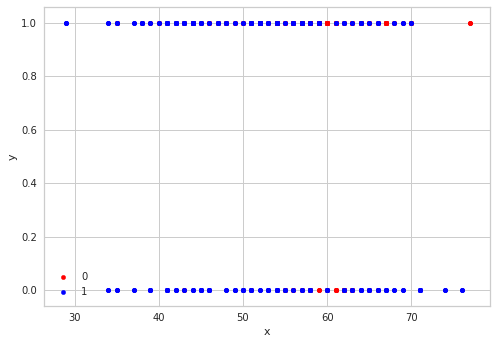

In [45]:
#visualize the data before any work is done
dt = DataFrame(dict(x=X[:,0], y=X[:,1], label=Y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = dt.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [46]:
#!pip install -U git+https://github.com/scikit-learn-contrib/imbalanced-learn.git

In [47]:
# random oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
x_resampled, y_resampled = ros.fit_resample(X, Y)

In [48]:
x_resampled

array([[52,  1,  0, ...,  0,  2,  3],
       [53,  1,  0, ...,  1,  0,  3],
       [70,  1,  0, ...,  1,  0,  3],
       ...,
       [64,  1,  0, ...,  1,  1,  2],
       [66,  1,  0, ...,  1,  1,  2],
       [59,  1,  0, ...,  0,  2,  1]])

In [49]:
y_resampled

0       0
1       0
2       0
3       0
4       0
5       1
6       0
7       0
8       0
9       0
10      1
11      0
12      1
13      0
14      0
15      1
16      1
17      0
18      1
19      1
20      0
21      1
22      1
23      1
24      1
25      0
26      1
27      0
28      0
29      0
       ..
1022    0
1023    1
1024    0
1025    0
1026    0
1027    0
1028    0
1029    0
1030    0
1031    0
1032    0
1033    0
1034    0
1035    0
1036    0
1037    0
1038    0
1039    0
1040    0
1041    0
1042    0
1043    0
1044    0
1045    0
1046    0
1047    0
1048    0
1049    0
1050    0
1051    0
Name: target, Length: 1052, dtype: int64

In [50]:
# number of examples after applying the algorithm
len(x_resampled)
len(y_resampled)

1052

In [51]:
# number of examples for each class
print(sorted(Counter(y_resampled).items()))

[(0, 526), (1, 526)]


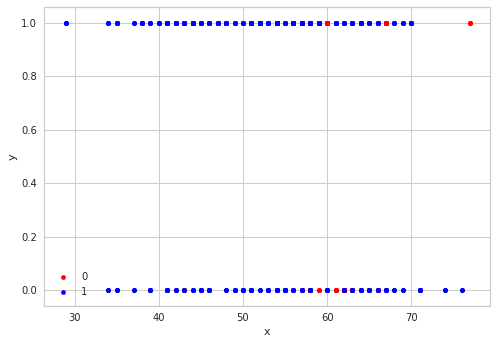

In [52]:
#visualize the data after algorithm is complete
dt = DataFrame(dict(x=x_resampled[:,0], y=x_resampled[:,1], label=y_resampled))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = dt.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

## Feature Selection

### Univariate Selection

In [53]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
utest = SelectKBest(score_func=chi2, k=4) 
fit = utest.fit(X, Y) # summarize scores 
#set_printoptions(precision=3) 
print(fit.scores_) 
features = fit.transform(X) # summarize selected features
print(features[0:5,:])

[ 81.42536762  24.37365008 217.82392171  45.97406854 110.72336371
   1.47754962   9.73934262 650.00849349 130.47092725 210.62591949
  19.37346461]
[[  0 168   0   2]
 [  0 155   1   0]
 [  0 125   1   0]
 [  0 161   0   1]
 [  0 106   0   3]]


In [54]:
# 'age',  'sex',  'chest_pain', 'trestbps', 'chol', 'fst_bld_sug', 'restecg', 'max_hrt_rate', 'exangina',  'ca',   'thal'
#81.425    24.374    217.824        45.974   110.723    1.478         9.739        650.008       130.471   210.626  19.373

### Recursive Feature Elimination (or RFE)

In [55]:
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear') 
rfe = RFE(model, 3) 
fit = rfe.fit(X, Y) 
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_) 
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 3
Selected Features: [False  True False False False False False False  True  True False]
Feature Ranking: [9 1 3 7 8 5 4 6 1 1 2]


In [56]:
# 'age', 'sex', 'chest_pain', 'trestbps', 'chol', 'fst_bld_sug','restecg', 'max_hrt_rate', 'exangina', 'ca', 'thal'
#  9      1        3             7          8         5            4            6              1        1      2

In [57]:
test.columns

Index(['age', 'sex', 'chest_pain', 'trestbps', 'chol', 'fst_bld_sug',
       'restecg', 'max_hrt_rate', 'exangina', 'ca', 'thal', 'target'],
      dtype='object')

In [58]:
#x = test[['chest_pain', 'max_hrt_rate', 'ca', 'thal']]
#y = test[['target']]

In [59]:
x = x_resampled[:,[2,7,9,10]]
y = y_resampled

In [60]:
x

array([[  0, 168,   2,   3],
       [  0, 155,   0,   3],
       [  0, 125,   0,   3],
       ...,
       [  0,  96,   1,   2],
       [  0, 132,   1,   2],
       [  0,  90,   2,   1]])

In [61]:
y

0       0
1       0
2       0
3       0
4       0
5       1
6       0
7       0
8       0
9       0
10      1
11      0
12      1
13      0
14      0
15      1
16      1
17      0
18      1
19      1
20      0
21      1
22      1
23      1
24      1
25      0
26      1
27      0
28      0
29      0
       ..
1022    0
1023    1
1024    0
1025    0
1026    0
1027    0
1028    0
1029    0
1030    0
1031    0
1032    0
1033    0
1034    0
1035    0
1036    0
1037    0
1038    0
1039    0
1040    0
1041    0
1042    0
1043    0
1044    0
1045    0
1046    0
1047    0
1048    0
1049    0
1050    0
1051    0
Name: target, Length: 1052, dtype: int64

## Data Preprocessing

### Rescale Data

In [62]:
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler(feature_range=(0,1))
rescaledX = mmscaler.fit_transform(x)
rescaledY = mmscaler.fit_transform([y])
from numpy import set_printoptions
set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[0.    0.74  0.5   1.   ]
 [0.    0.641 0.    1.   ]
 [0.    0.412 0.    1.   ]
 [0.    0.687 0.25  1.   ]
 [0.    0.267 0.75  0.667]]


In [63]:
rescaledY

array([[0., 0., 0., ..., 0., 0., 0.]])

### Fitting Train_Test_Split Model

In [64]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(rescaledX, y, test_size=0.3, random_state=10)

In [65]:
x_train

array([[0.667, 0.58 , 0.   , 0.667],
       [0.   , 0.58 , 0.25 , 1.   ],
       [0.333, 0.771, 0.   , 0.667],
       ...,
       [0.   , 0.191, 0.25 , 0.667],
       [0.667, 0.794, 0.   , 0.667],
       [0.   , 0.702, 0.   , 0.667]])

In [66]:
x_test

array([[0.667, 0.824, 0.   , 0.667],
       [0.   , 0.191, 0.25 , 0.667],
       [0.   , 0.557, 0.25 , 1.   ],
       ...,
       [0.   , 0.443, 0.5  , 1.   ],
       [0.   , 0.695, 0.75 , 0.667],
       [0.   , 0.542, 0.5  , 1.   ]])

In [67]:
y_train

1028    0
116     0
969     1
803     0
603     1
941     1
1035    0
863     0
280     1
353     1
484     0
167     1
962     1
295     0
30      0
903     0
510     1
37      1
372     1
100     1
927     1
245     1
80      0
931     0
84      1
495     1
789     0
345     0
764     0
242     1
       ..
606     0
919     0
406     1
1037    0
93      0
283     1
825     1
543     0
652     1
89      0
670     0
653     0
409     0
755     1
13      0
77      0
974     1
574     0
54      0
395     1
239     0
356     0
371     0
502     1
40      1
490     1
256     1
1032    0
733     1
527     1
Name: target, Length: 736, dtype: int64

In [68]:
y_test

223     1
177     0
339     0
567     1
582     1
835     0
285     1
592     0
664     1
64      1
155     1
520     0
573     0
661     0
821     0
610     0
142     0
381     0
16      1
849     0
799     1
1046    0
568     1
519     0
870     1
370     0
43      0
133     1
704     1
621     0
       ..
442     0
752     1
892     0
1029    0
259     1
829     0
174     0
857     1
504     0
190     1
252     0
728     0
932     1
140     0
443     1
361     1
716     0
743     1
94      1
487     0
878     0
578     1
197     1
703     1
334     0
907     1
152     0
737     0
387     0
571     0
Name: target, Length: 316, dtype: int64

## Logistic Regression Algorithm

In [69]:
#Importing Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()

In [70]:
#Fitting Logistic Regression Algorithm
logr.fit(x_train, y_train)

LogisticRegression()

In [71]:
logr

LogisticRegression()

In [72]:
#Predicting the Values
logr.predict([[1,120,0,2]])

array([1])

In [73]:
predict = logr.predict(x_test)
predict

array([1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,

In [74]:
len(predict)

316

### Test Accuracy

In [75]:
logr.score(x_test,y_test)*100

84.81012658227847

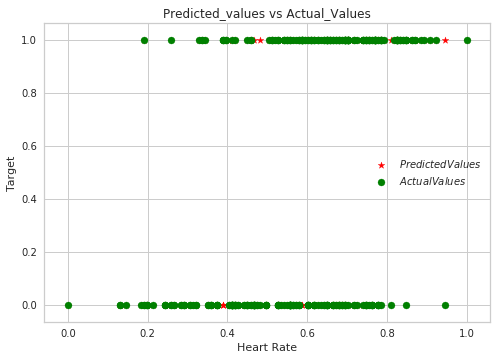

In [76]:
plt.scatter(x_test[:,1], predict, color='red', marker='*', label=r'$Predicted Values$')
plt.scatter(x_test[:,1], y_test, color='green', marker='o', label=r'$Actual Values$')
plt.gca().update(dict(title='Predicted_values vs Actual_Values', xlabel='Heart Rate', ylabel='Target'))
plt.legend()
plt.show()

## Random Forest Algorithm

In [77]:
#Fitting Random Forest Algorithm
from sklearn.ensemble import RandomForestClassifier
rfa = RandomForestClassifier()
rfa.fit(x_train,y_train)

RandomForestClassifier()

In [78]:
#Predicting the Values
rfa.predict([[3,100,2,1]])

array([0])

In [79]:
r_predict = rfa.predict(x_test)
r_predict

array([1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,

### Test Accuracy

In [80]:
rfa.score(x_test,y_test)*100

96.83544303797468

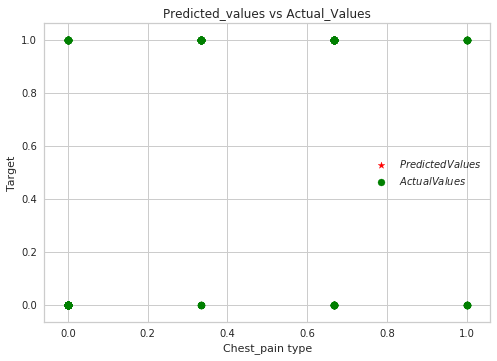

In [81]:
plt.scatter(x_test[:,0], r_predict, color='red', marker='*', label=r'$Predicted Values$')
plt.scatter(x_test[:,0], y_test, color='green', marker='o', label=r'$Actual Values$')
plt.gca().update(dict(title='Predicted_values vs Actual_Values', xlabel='Chest_pain type', ylabel='Target'))
plt.legend()
plt.show()

## DecisionTree Algorithm

In [82]:
#Fitting Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dtc =  DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [83]:
#predicting the Values
dtc.predict([[1,50,2,3]])

array([0])

In [84]:
d_predict = dtc.predict(x_test)
d_predict

array([1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,

### Test Accuracy

In [85]:
dtc.score(x_test,y_test)*100

96.83544303797468

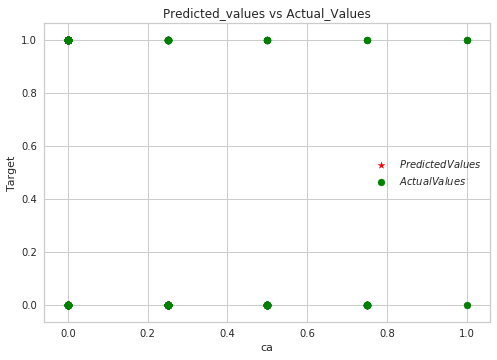

In [86]:
plt.scatter(x_test[:,2], d_predict, color='red', marker='*', label=r'$Predicted Values$')
plt.scatter(x_test[:,2], y_test, color='green', marker='o', label=r'$Actual Values$')
plt.gca().update(dict(title='Predicted_values vs Actual_Values', xlabel='ca', ylabel='Target'))
plt.legend()
plt.show()

## KNN Algorithm

In [87]:
# Fitting kNN on our scaled data set
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [88]:
k_predict = knn.predict(x_test)
k_predict

array([1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,

### Test Accuracy

In [89]:
knn.score(x_test,y_test)*100

85.44303797468355

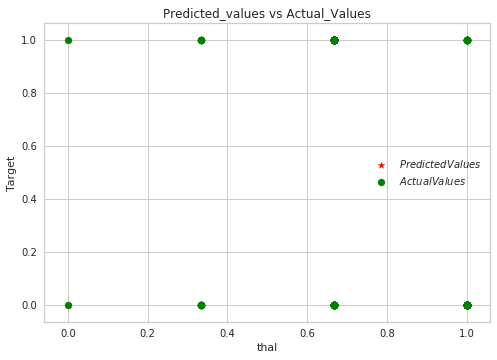

In [90]:
plt.scatter(x_test[:,3], k_predict, color='red', marker='*', label=r'$Predicted Values$')
plt.scatter(x_test[:,3], y_test, color='green', marker='o', label=r'$Actual Values$')
plt.gca().update(dict(title='Predicted_values vs Actual_Values', xlabel='thal', ylabel='Target'))
plt.legend()
plt.show()

In [91]:
# ML Algorithm           Accuracy
#================       ============
# 1.Logistic Regression   84.81 % 
# 2.Random Forest         96.83 %
# 3.Decision Tree         96.83 %
# 4.KNN                   85.44 %


### ANN (Artificial Neural Network) 

In [92]:
test.columns

Index(['age', 'sex', 'chest_pain', 'trestbps', 'chol', 'fst_bld_sug',
       'restecg', 'max_hrt_rate', 'exangina', 'ca', 'thal', 'target'],
      dtype='object')

In [93]:
X = test.drop(['age', 'sex', 'trestbps', 'chol', 'fst_bld_sug', 'restecg', 'exangina', 'target'], axis=1)

In [94]:
Y = test[['target']]

In [95]:
X

,chest_pain,max_hrt_rate,ca,thal
0,0,168,2,3
1,0,155,0,3
2,0,125,0,3
3,0,161,1,3
4,0,106,3,2
5,0,122,0,2
6,0,140,3,1
7,0,145,1,3
8,0,144,0,3
9,0,116,2,2


In [96]:
Y

,target
0,0
1,0
2,0
3,0
4,0
5,1
6,0
7,0
8,0
9,0


In [97]:
# Data Preprocessing 
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()

In [98]:
x_scaled = mmscaler.fit_transform(X)

In [99]:
y_scaled = mmscaler.fit_transform(Y)

In [100]:
x_scaled

array([[0.   , 0.74 , 0.5  , 1.   ],
       [0.   , 0.641, 0.   , 1.   ],
       [0.   , 0.412, 0.   , 1.   ],
       ...,
       [0.   , 0.359, 0.25 , 0.667],
       [0.   , 0.672, 0.   , 0.667],
       [0.   , 0.321, 0.25 , 1.   ]])

In [101]:
y_scaled

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]])

In [102]:
#Spliting the model into train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, Y, test_size= 0.3)

In [103]:
x_train

array([[0.667, 0.519, 0.75 , 1.   ],
       [0.667, 0.748, 1.   , 0.667],
       [0.667, 0.45 , 0.25 , 0.667],
       ...,
       [0.667, 0.42 , 0.75 , 0.667],
       [0.   , 0.412, 0.   , 0.333],
       [0.   , 0.603, 0.5  , 1.   ]])

In [104]:
y_train

,target
400,0
128,1
605,1
825,1
35,0
831,1
157,1
312,0
1024,0
144,1


In [105]:
# Import Tensorflow.keras to maker our models run faster
import tensorflow.keras

# We import Sequential the steps go from left to right
from keras.models import Sequential

# Fully Connected to next layer
from keras.layers import Dense

# Building Model
model = Sequential()

# 20 Neuoron , 4 - Features - Activation relu

# In a neural network, the activation function is responsible for transforming the summed
#weighted input from the node into the activation of the node or output for that input

# plus adding first input layer
model.add(Dense(20, input_dim=4, activation='relu'))

# Adding second Hidden Layer

model.add(Dense(20, activation='relu'))

# We need the get single output / Out put activation function 

model.add(Dense(1, activation='linear'))

# threshold: A float giving the threshold value of the activation function below which values will be damped or set to zero.

model.summary()

# 20 neurons in hidden layer   (None, 20)   +             100 params =     20 newuron * 4 inputs       +      20 biases 

# dense_5 (Dense)              (None, 20)                420 

# 20 neuron(Input layer) * 20 neuron ( Output Layer) + 20 baises


#Bias is like the intercept added in a linear equation. 
#It is an additional parameter in the Neural Network which is
#used to adjust the output along with the weighted sum of the inputs to the neuron. 
#Thus, Bias is a constant which helps the model in a way that it can fit best for the given data


# 20 Neurons and One bais

Using TensorFlow backend.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                100       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


In [106]:
model.compile(optimizer='adam', loss='mean_squared_error')

# Adam optimezer will help to reduce the mean square errors ..........

#https://keras.io/api/optimizers/

In [107]:
epochs_hist = model.fit(x_train, y_train, epochs=20, batch_size=25,  verbose=1, validation_split=0.25)

# How many round it shoud cycle is epoches /          batcsize - 25 samples 


# Verbose ...How to you want to view the training data 

#By setting verbose 0, 1 or 2 you just say how do you want to 'see' the training progress for each epoch.

#verbose=0 will show you nothing (silent)

#verbose=1 will show you an animated progress bar like this: ===================progres_bar

#verbose=2 will just mention the number of epoch like this:


# If is student does only assignments ... If new question is given he cannot answer ... 

# validation_split=0.2  ----------- Splitiing and bringing Genneralization capability

# TO avoid overfitting


#Mean Square Error is going down




Train on 537 samples, validate on 180 samples
Epoch 1/20





537/537 [==============================] - 1s 2ms/step - loss: 0.7404 - val_loss: 0.4505
Epoch 2/20
537/537 [==============================] - 0s 68us/step - loss: 0.3621 - val_loss: 0.3068
Epoch 3/20
537/537 [==============================] - 0s 68us/step - loss: 0.2908 - val_loss: 0.2710
Epoch 4/20
537/537 [==============================] - 0s 69us/step - loss: 0.2599 - val_loss: 0.2439
Epoch 5/20
537/537 [==============================] - 0s 68us/step - loss: 0.2323 - val_loss: 0.2107
Epoch 6/20
537/537 [==============================] - 0s 69us/step - loss: 0.1999 - val_loss: 0.1765
Epoch 7/20
537/537 [==============================] - 0s 68us/step - loss: 0.1733 - val_loss: 0.1540
Epoch 8/20
537/537 [==============================] - 0s 70us/step - loss: 0.1581 - val_loss: 0.1418
Epoch 9/20
537/537 [==============================] - 0s 68us/step - loss: 0.1501 - val_loss: 0.1366
Epoch 10/20
537/537 [=================

In [108]:
print(epochs_hist.history.keys())

dict_keys(['val_loss', 'loss'])


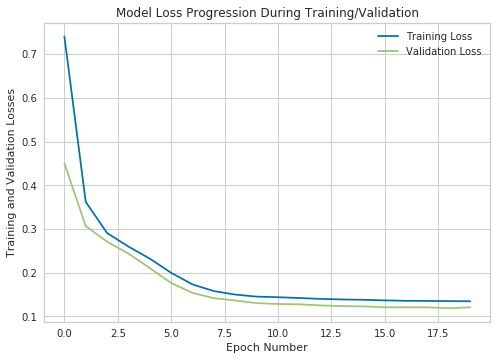

In [109]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])
plt.gca().update(dict(title='Model Loss Progression During Training/Validation'))
plt.show()

In [110]:

#  'chest_pain', 'max_hrt_rate', 'ca', 'thal'
# ***(Note that input data must be normalized)***

X_test_sample = np.array([[0.667, 0.45 , 0.25 , 0.667]])

y_predict_sample = model.predict(X_test_sample)

print('Target=', y_predict_sample)
y_predict_sample_orig = mmscaler.inverse_transform(y_predict_sample)
print('Target=', y_predict_sample_orig)


Target= [[0.512]]
Target= [[0.512]]


In [111]:
predict = model.predict(x_test)
predict

array([[ 0.544],
       [ 0.151],
       [ 0.783],
       [ 0.566],
       [ 0.36 ],
       [ 0.16 ],
       [ 0.057],
       [ 0.967],
       [ 0.55 ],
       [ 0.153],
       [ 0.001],
       [ 0.499],
       [ 0.07 ],
       [ 0.611],
       [ 0.426],
       [ 0.44 ],
       [ 0.783],
       [ 0.303],
       [ 0.57 ],
       [ 0.188],
       [ 0.57 ],
       [ 0.597],
       [ 0.711],
       [ 0.172],
       [ 0.727],
       [ 0.725],
       [ 0.692],
       [ 0.512],
       [ 0.561],
       [ 0.994],
       [ 0.55 ],
       [ 0.678],
       [ 1.114],
       [ 0.986],
       [ 0.57 ],
       [ 0.791],
       [ 0.781],
       [ 0.53 ],
       [ 0.588],
       [ 0.755],
       [ 0.842],
       [ 0.67 ],
       [ 0.393],
       [ 0.865],
       [ 0.005],
       [-0.015],
       [-0.003],
       [ 0.022],
       [ 0.677],
       [ 0.407],
       [ 0.878],
       [ 0.393],
       [ 0.029],
       [ 0.146],
       [ 0.553],
       [ 0.094],
       [-0.033],
       [-0.019],
       [ 0.34 

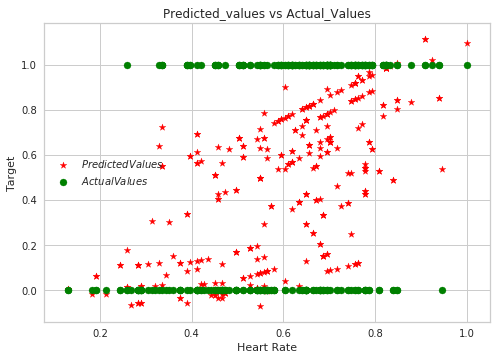

In [112]:
plt.scatter(x_test[:,1], predict, color='red', marker='*', label=r'$Predicted Values$')
plt.scatter(x_test[:,1], y_test, color='green', marker='o', label=r'$Actual Values$')
plt.gca().update(dict(title='Predicted_values vs Actual_Values', xlabel='Heart Rate', ylabel='Target'))
plt.legend()
plt.show()

### Result: Here we have predicted the values by using different types of Machine Learning Algorithms and find the accuracy of them. We also compared the actual and predicted values for different ML Algorithm models and their accuracy too. Also we have build the ANN model and predict the data, from this we have understand that ANN model gives more accurate prediction.